2024-04-08 17:53:38.214335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


clasess 16
label dict {1: '511144', 2: '518576', 3: '459495', 4: '490704', 5: '523522', 6: '522691', 7: '495494', 8: '491515', 9: '506122', 10: '489367', 11: '521825', 12: '555555', 13: '20240403', 14: '444444', 15: '524271', 16: '123456'}
num clasees 16


/Users/simranbirkaur/Python_Miniconda/miniconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.0490 - loss: 2.7857 - val_accuracy: 0.0938 - val_loss: 2.7301
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1281 - loss: 2.7333 - val_accuracy: 0.3125 - val_loss: 2.6927
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2677 - loss: 2.6886 - val_accuracy: 0.4688 - val_loss: 2.6588
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2135 - loss: 2.6560 - val_accuracy: 0.5000 - val_loss: 2.6256
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3500 - loss: 2.6284 - val_accuracy: 0.6562 - val_loss: 2.5904
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4187 - loss: 2.5807 - val_accuracy: 0.7812 - val_loss: 2.5537
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5021 - loss: 2.5489 - val_accuracy: 0.8125 - val_loss: 2.5168
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5990 - loss: 2.5006 - val_accuracy: 0.8438 - val_loss:

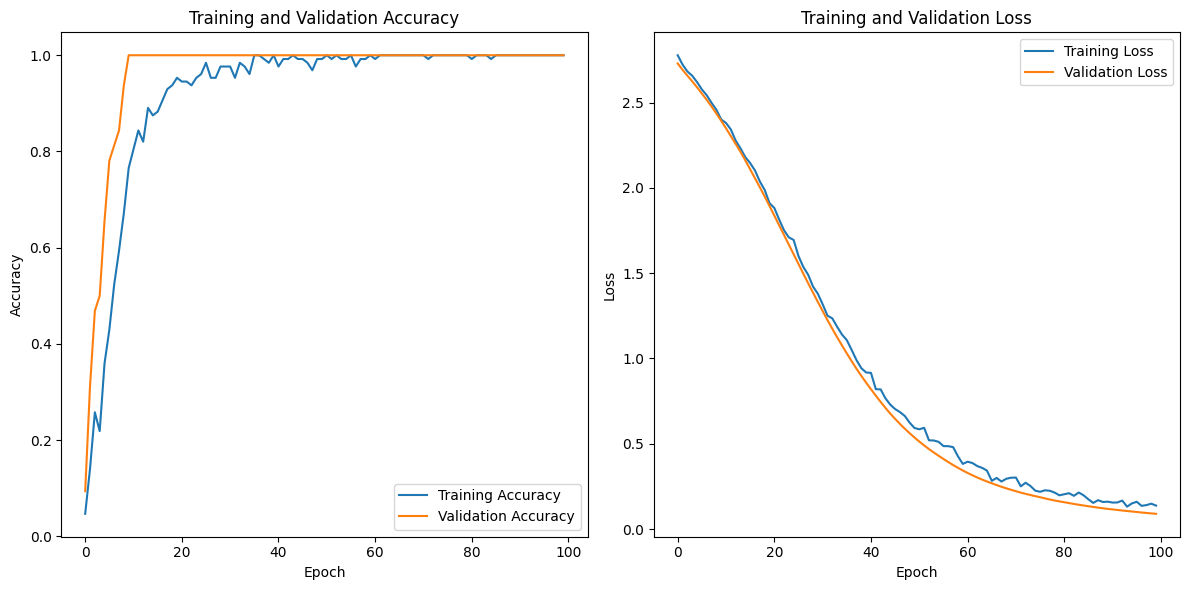

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


INFO:root:Confidence Scores: [0.8675326  0.91114104 0.9389332  0.91208214 0.9395276  0.94857216
 0.9558069  0.9195625  0.87712044 0.9556923  0.86053175 0.9632468
 0.95071507 0.8451075  0.9180812  0.9011217  0.90123564 0.92389303
 0.9107421  0.93818516 0.85532975 0.8921544  0.90371484 0.89037406
 0.9604289  0.91229075 0.94464827 0.96524113 0.93556875 0.87807834
 0.95110184 0.8592964 ]
INFO:root:Test Accuracy: 1.0


Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R^2 Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

      511144       1.00      1.00      1.00         2
      518576       1.00      1.00      1.00         2
      459495       1.00      1.00      1.00         2
      490704       1.00      1.00      1.00         2
      523522       1.00      1.00      1.00         2
      522691       1.00      1.00      1.00         2
      495494       1.00      1.00      1.00         2
      491515       1.00      1.00      1.00         2
      506122       1.00      1.00      1.00         2
      489367       1.00      1.00      1.00         2
      521825       1.00      1.00      1.00         2
      555555       1.00      1.00      1.00         2
    20240403       1.00      1.00      1.00         2
      444444       1.00      1.00      1.00         2
      524271       1.00      1.00      1.0

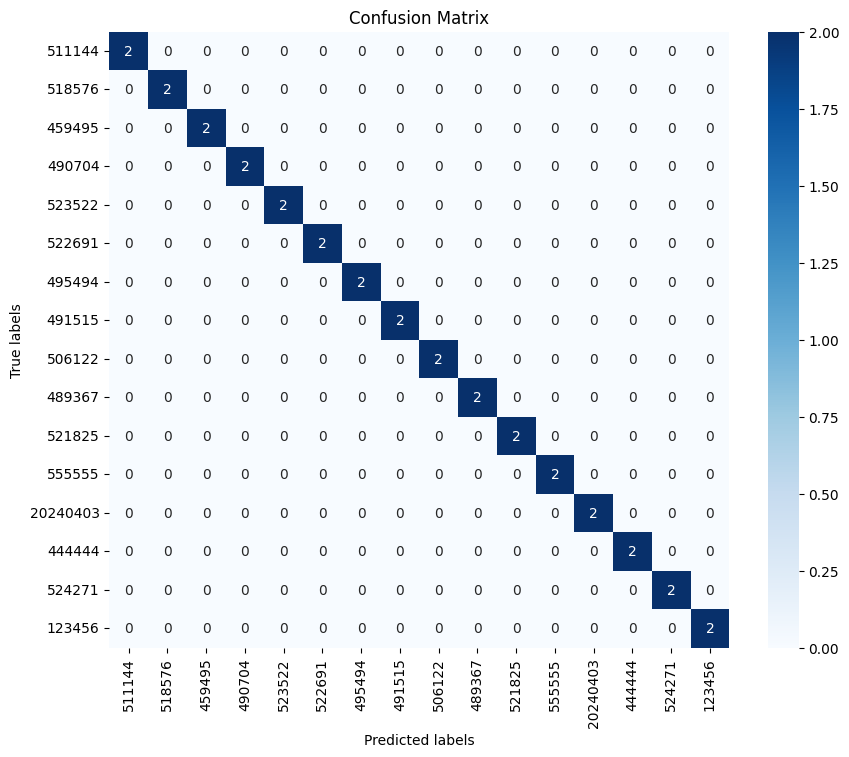

In [1]:
import numpy as np
import os
import cv2
import dlib
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

# Configure logging
logging.basicConfig(level=logging.INFO)

def load_face_recognition_models():
    """
    Load the face detection, landmark predictor, and face recognition models.
    """
    face_detector = dlib.get_frontal_face_detector()
    shape_predictor = dlib.shape_predictor("/Users/simranbirkaur/Desktop/capstone_final/Face-Recognition-Based-Attendance-System/Dlib_files/shape_predictor_68_face_landmarks.dat")
    face_encoder = dlib.face_recognition_model_v1("/Users/simranbirkaur/Desktop/capstone_final/Face-Recognition-Based-Attendance-System/Dlib_files/dlib_face_recognition_resnet_model_v1.dat")
    return face_detector, shape_predictor, face_encoder


def extract_face_encodings(image, face_detector, shape_predictor, face_encoder):
    """
    Extract facial encodings from an image.
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rects = face_detector(gray, 1)
    encodings = [np.array(face_encoder.compute_face_descriptor(image, shape_predictor(gray, rect))) for rect in rects]
    return encodings


def preprocess_images_and_labels(images_folder, face_detector, shape_predictor, face_encoder):
    """
    Preprocess images and extract encodings and labels.
    """
    encodings = []
    labels = []
    labels_dict ={}
    label = 0
    for root, dirs, files in os.walk(images_folder):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)
                if image is None:
                    logging.error(f"Failed to load image: {image_path}")
                    continue
                face_encs = extract_face_encodings(image, face_detector, shape_predictor, face_encoder)
                encodings.extend(face_encs)
                #labels.extend([os.path.basename(root)])
                labels.extend([os.path.basename(root)] * len(face_encs))
        labels_dict[label] = os.path.basename(root)
        label += 1
        #print("label dict", labels_dict)
        
    labels_dict.pop(0, None)       
    le = LabelEncoder()
    labels_encoded = le.fit_transform(labels)
    num_classes = len(le.classes_)
    print("clasess", num_classes)
    labels_encoded = to_categorical(labels_encoded, num_classes)  # Convert labels to one-hot encoding
    print("label dict", labels_dict)

    return np.array(encodings), np.array(labels_encoded), num_classes, labels_dict


def build_model(input_shape, num_classes):
    """
    Build the CNN model.
    """
    print("num clasees", num_classes)
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def evaluate_model(model, X_test, y_test, labels_dict):
    """
    Evaluate the trained CNN model.
    """
    y_pred_prob = model.predict(X_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)
    confidence_scores = np.max(y_pred_prob, axis=1)
    logging.info("Confidence Scores: %s", confidence_scores)
    accuracy = accuracy_score(y_true, y_pred)
    logging.info("Test Accuracy: %s", accuracy)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("=" * 50)
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=labels_dict.values()))
    
    # Confusion Matrix
    print("Confusion Matrix:")
    plot_confusion_matrix(y_true, y_pred, labels_dict)
    


def loadModel():
    
    print("Training faces. It will take a few seconds. Please wait ...")

    # Load face recognition models
    face_detector, shape_predictor, face_encoder = load_face_recognition_models()

    # Preprocess images and labels
    encodings, labels, num_classes, labels_dict = preprocess_images_and_labels('/Users/simranbirkaur/Desktop/capstone_final/Face-Recognition-Based-Attendance-System/dataset/images', face_detector, shape_predictor, face_encoder)

    # Preprocess data
    X_train, X_test, y_train, y_test = train_test_split(encodings, labels, test_size=0.2, random_state=42,
                                                        stratify=labels)

    # Build CNN model
    model = build_model(input_shape=X_train.shape[1:], num_classes=num_classes)

    # Train CNN model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

    # Plot Training History
    plot_training_history(history)
    
    # Evaluate CNN model
    evaluate_model(model, X_test, y_test, labels_dict)
       


def plot_training_history(history):
    """
    Plot training history (accuracy and loss).
    """
    plt.figure(figsize=(12, 6))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.tight_layout()
    plt.show()



def plot_confusion_matrix(y_true, y_pred,labels_dict):
    """
    Plot confusion matrix using seaborn.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels_dict.values(), yticklabels=labels_dict.values())
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()



loadModel()

